# U-statistic Permutation Test

The U-statistic is defined for a 2D binned distribution (table) as, 

$$
 U = \frac{1}{n(n-3)} \sum_{i=1}^{N}\sum_{j=1}^{M} (o_{ij} - o_{i}o_{j})^{2} - \frac{4}{n(n-2)(n-3)} \sum_{i=1}^{N}\sum_{j=1}^{M} o_{ij}o_{i}o_{j}
$$

for $N$ bins in $X$ and $M$ bins in $Y$ where the observed number of events in the bin $(i,j)$ is $o_{ij}$ and the observed number of events in bin $i$ along $X$ is $o_{i}$ and the observed number of events in bin $j$ along $X$ is $o_{j}$. There are $n$ events overall. 

We expect $U=0$ when $X$ and $Y$ are **independent**

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

plt.rc('font', size=14) 
plt.rcParams['figure.figsize'] = (6, 6)

Let's take a simple example of correlated data, where both $X$ and $Y$ are distributed as Gaussian random variables with $\mu_{X}=\mu_{Y}=0$ and $\sigma_{X}=2$, $\sigma_{Y}=3$ 

the correlation between $X$ and $Y$ is 0.5. 

In [2]:
cov = np.empty((2, 2))
cov[0, 0] = 2 ** 2
cov[1, 1] = 3 ** 2
rho = 0.5
cov[0, 1] = rho * np.sqrt(cov[0, 0] * cov[1, 1])
cov[1, 0] = cov[0, 1]

rng = np.random.default_rng(1)
xy  = rng.multivariate_normal([0, 0], cov, size=500)

x = xy[:,0]
y = xy[:,1]

w, xe, ye = np.histogram2d(x,y)

Text(0, 0.5, '$Y$')

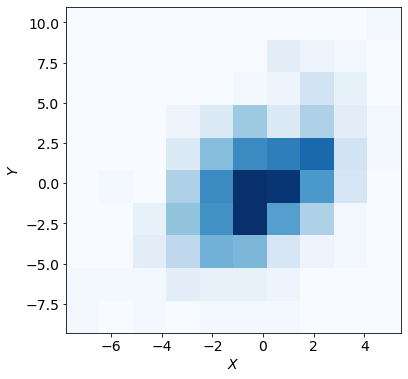

In [3]:
plt.pcolormesh(xe, ye, w.T,cmap=plt.cm.Blues)
plt.xlabel("$X$")
plt.ylabel("$Y$")

We can use the python `resample` package in which the authors of [R. Soc. A477: 20210549](https://royalsocietypublishing.org/doi/epdf/10.1098/rspa.2021.0549) have implemented the $U$ test statistic and the bootstrap via permutation for us! 

We can see the U-statistic distribution under $H_{0}$ from the bootstrap samples. 

As usual, for a test of size $\alpha=$0.05, we can define the critical region $w$ as the region for which $U>U_{\mathrm{min}}$.  

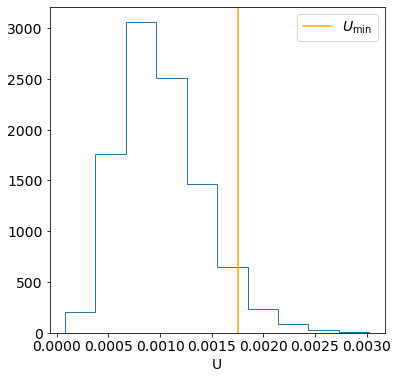

In [4]:
from resample import permutation as perm

U = perm.usp(w)
Umin = np.quantile(U.samples,0.95)
plt.hist(U.samples,histtype='step')
plt.axvline(Umin,color='orange',label="$U_{\mathrm{min}}$")
plt.xlabel("U")
plt.legend()

We can also include the test-statsitic in data. In this case, the test-statistic lands in the critical region, so we would reject the null hypothesis and claim that $X$ and $Y$ are *not independent*. 

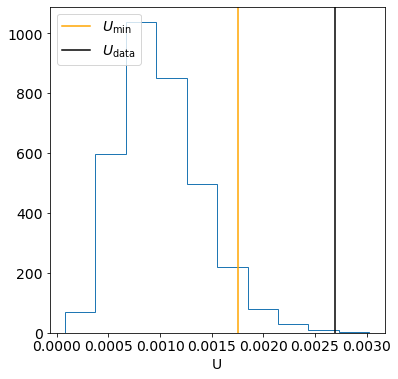

In [5]:
plt.hist(U.samples,histtype='step',density=1)
plt.axvline(Umin,color='orange',label="$U_{\mathrm{min}}$")
plt.xlabel("U")
plt.axvline(U.statistic,color='black',label="$U_{\mathrm{data}}$")
plt.legend()

Of course, we probably would have claimed the same given the value of the sample correlation $\bar{\rho}$ is also large

In [6]:
print(stats.pearsonr(x,y)[0])

0.45531887048752695


Let's take a look at our pathological example. We'll create a dataset with an average dependence $Y=X^{2}$ including some noise. 

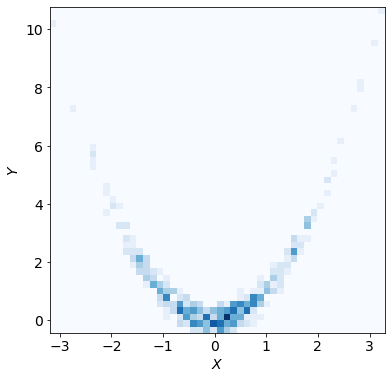

In [12]:
x = stats.norm.rvs(0,1,size=500)
noise = stats.norm.rvs(0,0.25,size=500)
y = x**2+noise

w, xe, ye = np.histogram2d(x,y,bins=(50,50))
plt.cla()
plt.pcolormesh(xe, ye, w.T,cmap=plt.cm.Blues)
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.savefig("xy2.pdf")

Now let's see what the  test looks like in this case.

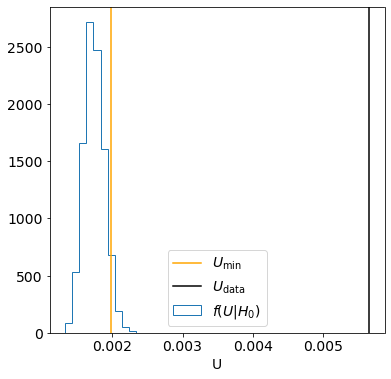

In [13]:
U = perm.usp(w)
Umin = np.quantile(U.samples,0.95)
plt.hist(U.samples,histtype='step',label="$f(U|H_{0})$")
plt.axvline(Umin,color='orange',label="$U_{\mathrm{min}}$")
plt.axvline(U.statistic,color='black',label="$U_{\mathrm{data}}$")
plt.xlabel("U")
plt.legend()
plt.savefig("usptest.pdf")

Clearly the observed value of the test statistic is well inside the critical region $U_{\mathrm{data}} >> U_{\mathrm{min}}$ so we reject the hypothesis that $X$ and $Y$ are independent. However, looking at the sample correlation, we wouldn't have made the same claim.

In [14]:
print(stats.pearsonr(x,y)[0])

0.08473699586008498
